# DS56 — Correlation Analysis (Regional & Sectoral)

**Member Assigned:** SORALDE, Adrian
**Task Name:** Correlation Analysis (Regional & Sectoral)

## Task Description
Analyze relationships among economic indicators using correlation measures. Compute Pearson correlations between GRDP levels, growth rates, volatility metrics, and sectoral shares to explore directional relationships.

## Expected Outputs
- Correlation matrix table
- Interpretation of strong and weak relationships
- Correlation heatmap visualization
- Brief analysis discussing possible economic insights

## Dataset: SECTORAL ECONOMIC STRUCTURE (Sector Level)



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Robust BASE_DIR resolution for script and notebook contexts.
try:
    BASE_DIR = Path(__file__).resolve().parents[2]
except NameError:
    cwd = Path.cwd().resolve()
    if (cwd / '03_Cleaned_Data').exists():
        BASE_DIR = cwd
    elif (cwd.parent / '03_Cleaned_Data').exists():
        BASE_DIR = cwd.parent
    else:
        BASE_DIR = cwd.parents[1] if len(cwd.parents) > 1 else cwd

CLEAN_DIR = BASE_DIR / '03_Cleaned_Data'
OUT_TABLES = BASE_DIR / 'outputs' / 'tables'
OUT_FIGS = BASE_DIR / 'outputs' / 'figures'

OUT_TABLES.mkdir(parents=True, exist_ok=True)
OUT_FIGS.mkdir(parents=True, exist_ok=True)

print(f'BASE_DIR: {BASE_DIR}')
print(f'CLEAN_DIR: {CLEAN_DIR}')
print(f'OUT_TABLES: {OUT_TABLES}')
print(f'OUT_FIGS: {OUT_FIGS}')

BASE_DIR: C:\Users\dlajc\PycharmProjects\9345-Prelim-Summative-Activity-TeamWPS
CLEAN_DIR: C:\Users\dlajc\PycharmProjects\9345-Prelim-Summative-Activity-TeamWPS\03_Cleaned_Data
OUT_TABLES: C:\Users\dlajc\PycharmProjects\9345-Prelim-Summative-Activity-TeamWPS\outputs\tables
OUT_FIGS: C:\Users\dlajc\PycharmProjects\9345-Prelim-Summative-Activity-TeamWPS\outputs\figures


In [10]:
# Load Dataset 3 (primary input)
file_d3 = CLEAN_DIR / 'Dataset 3 Region_Sector_Structure (CLEANED).csv'
df = pd.read_csv(file_d3)

print('Shape:', df.shape)
print(df.head())
print('\nUnique regions:', df['Region'].nunique())
print('Unique sectors:', sorted(df['Main_Sector'].dropna().unique().tolist()))
print('Year range:', int(df['Year'].min()), 'to', int(df['Year'].max()))
print('Price types:', sorted(df['Price_Type'].dropna().unique().tolist()))


Shape: (3224, 5)
                                            Region  \
0  Bangsamoro Autonomous Region in Muslim Mindanao   
1  Bangsamoro Autonomous Region in Muslim Mindanao   
2  Bangsamoro Autonomous Region in Muslim Mindanao   
3  Bangsamoro Autonomous Region in Muslim Mindanao   
4  Bangsamoro Autonomous Region in Muslim Mindanao   

                          Main_Sector  Year               Price_Type  \
0  Agriculture, forestry, and fishing  2000  At Constant 2018 Prices   
1  Agriculture, forestry, and fishing  2000        At Current Prices   
2  Agriculture, forestry, and fishing  2001  At Constant 2018 Prices   
3  Agriculture, forestry, and fishing  2001        At Current Prices   
4  Agriculture, forestry, and fishing  2002  At Constant 2018 Prices   

   Sector_GRDP  
0   55373996.0  
1   23764098.0  
2   50753557.0  
3   20362653.0  
4   58042444.0  

Unique regions: 17
Unique sectors: ['Agriculture, forestry, and fishing', 'Gross Domestic Product', 'Industry', 'Services'

In [11]:
# Cleaning / standardization
expected_sectors = [
    'Agriculture, forestry, and fishing',
    'Industry',
    'Services'
]

df['Main_Sector'] = (
    df['Main_Sector']
    .astype(str)
    .str.strip()
    .str.replace(r'\s+', ' ', regex=True)
)

df['Sector_GRDP'] = pd.to_numeric(df['Sector_GRDP'], errors='coerce')

before_rows = len(df)
df = df.dropna(subset=['Sector_GRDP']).copy()
after_numeric_rows = len(df)

# Keep only expected sectors for structural comparison
invalid_sector_rows = (~df['Main_Sector'].isin(expected_sectors)).sum()
df = df[df['Main_Sector'].isin(expected_sectors)].copy()
after_sector_rows = len(df)

print(f'Rows before numeric cleaning: {before_rows}')
print(f'Rows after dropping non-numeric Sector_GRDP: {after_numeric_rows}')
print(f'Rows removed for non-target sectors: {invalid_sector_rows}')
print(f'Rows in final cleaned scope: {after_sector_rows}')
print('Sectors retained:', sorted(df['Main_Sector'].unique().tolist()))


Rows before numeric cleaning: 3224
Rows after dropping non-numeric Sector_GRDP: 3224
Rows removed for non-target sectors: 806
Rows in final cleaned scope: 2418
Sectors retained: ['Agriculture, forestry, and fishing', 'Industry', 'Services']


In [12]:
def safe_tag(value):
    text = str(value).strip()
    text = ''.join(ch if ch.isalnum() else '_' for ch in text)
    while '__' in text:
        text = text.replace('__', '_')
    return text.strip('_')

all_outputs = []
interpretation_rows = []

price_types = sorted(df['Price_Type'].dropna().unique().tolist())
print('Price types to analyze:', price_types)

Price types to analyze: ['At Constant 2018 Prices', 'At Current Prices']


In [64]:
df.head()

,Region,Main_Sector,Year,Price_Type,Sector_GRDP
0,Bangsamoro Autonomous Region in Muslim Mindanao,"Agriculture, forestry, and fishing",2000,At Constant 2018 Prices,55373996.0
1,Bangsamoro Autonomous Region in Muslim Mindanao,"Agriculture, forestry, and fishing",2000,At Current Prices,23764098.0
2,Bangsamoro Autonomous Region in Muslim Mindanao,"Agriculture, forestry, and fishing",2001,At Constant 2018 Prices,50753557.0
3,Bangsamoro Autonomous Region in Muslim Mindanao,"Agriculture, forestry, and fishing",2001,At Current Prices,20362653.0
4,Bangsamoro Autonomous Region in Muslim Mindanao,"Agriculture, forestry, and fishing",2002,At Constant 2018 Prices,58042444.0


In [65]:
print(df.columns)

Index(['Region', 'Main_Sector', 'Year', 'Price_Type', 'Sector_GRDP'], dtype='str')


In [71]:
import pandas as pd
import numpy as np

#Correlation of Year & Sector_GRDP for specific sectors

# Define the target sectors
target_sectors = [
    "Agriculture, forestry, and fishing",
    "Industry",
    "Services"
]

# Filter df3 for the target sectors and BOTH price types
df_filtered_sectors = df[
    (df["Price_Type"].isin(["At Constant 2018 Prices", "At Current Prices"])) &
    (df["Main_Sector"].isin(target_sectors))
].copy()

# Rename 'Sector_GRDP' to a more generic 'GRDP_Value' as it's not the total regional GRDP anymore
df_filtered_sectors = df_filtered_sectors.rename(columns={
    "Sector_GRDP": "GRDP_Value"
})

print("Pearson Correlation: Year vs. Sector GRDP (by Region, Sector, and Price Type) ---")

# Calculate correlation between Year and GRDP_Value for each Region, Sector, and Price Type
correlation_year_sector_gdp = (
    df_filtered_sectors.groupby(["Region", "Main_Sector", "Price_Type"])
    .apply(lambda x: x["Year"].corr(x["GRDP_Value"]), include_groups=False)
    .rename("Correlation_Year_Sector")
)

print("\nPearson Correlation (Year & Sector GRDP for selected sectors and price types)")
display(correlation_year_sector_gdp.to_frame().round(2))


Pearson Correlation: Year vs. Sector GRDP (by Region, Sector, and Price Type) ---

Pearson Correlation (Year & Sector GRDP for selected sectors and price types)


Correlation_Year_Sector
Region                                          Main_Sector                        Price_Type                                      
Bangsamoro Autonomous Region in Muslim Mindanao Agriculture, forestry, and fishing At Constant 2018 Prices                     0.68
                                                                                   At Current Prices                           0.78
                                                Industry                           At Constant 2018 Prices                     0.86
                                                                                   At Current Prices                           0.83
                                                Services                           At Constant 2018 Prices                     0.78
...                                                                                                                             ...
Zamboanga Peninsula                             Agriculture, forestry, and fishing At Current Prices                           0.80
                                                Industry                           At Constant 2018 Prices                     0.85
                                                                                   At Current Prices                           0.83
                                                Services                           At Constant 2018 Prices                     0.80
                                                                                   At Current Prices                           0.83

[102 rows x 1 columns]

In [105]:
import pandas as pd
import numpy as np

# Filter constant prices
df_constant = df[df["Price_Type"] == "At Constant 2018 Prices"].copy()

target_sectors = [
    "Agriculture, forestry, and fishing",
    "Industry",
    "Services",
]

# Keep only the three main sectors
df_constant = df_constant[
    df_constant["Main_Sector"].isin(target_sectors)
]

# Compute Total Regional GRDP safely using transform
df_constant["Total_Regional_GRDP"] = (
    df_constant
        .groupby(["Region", "Year"])["Sector_GRDP"]
        .transform("sum")
)

print("Pearson Correlation: Sector Output vs. Total Regional GRDP (by Region and Sector)")

correlation_sector_output_total_gdp = (
    df_constant
    .groupby(["Region", "Main_Sector"])
    .apply(lambda x: x["Sector_GRDP"].corr(x["Total_Regional_GRDP"]))
    .rename("Correlation")
)

display(correlation_sector_output_total_gdp.to_frame().round(2))


Pearson Correlation: Sector Output vs. Total Regional GRDP (by Region and Sector)


Correlation
Region                                          Main_Sector                                    
Bangsamoro Autonomous Region in Muslim Mindanao Agriculture, forestry, and fishing         0.98
                                                Industry                                   0.99
                                                Services                                   1.00
Bicol Region                                    Agriculture, forestry, and fishing         0.96
                                                Industry                                   1.00
                                                Services                                   1.00
CALABARZON                                      Agriculture, forestry, and fishing         0.97
                                                Industry                                   1.00
                                                Services                                   1.00
Cagayan Valley                                  Agriculture, forestry, and fishing         0.99
                                                Industry                                   1.00
                                                Services                                   1.00
Caraga                                          Agriculture, forestry, and fishing         0.93
                                                Industry                                   0.99
                                                Services                                   1.00
Central Luzon                                   Agriculture, forestry, and fishing         0.98
                                                Industry                                   1.00
                                                Services                                   1.00
Central Visayas                                 Agriculture, forestry, and fishing         0.95
                                                Industry                                   1.00
                                                Services                                   1.00
Cordillera Administrative Region                Agriculture, forestry, and fishing        -0.14
                                                Industry                                   0.92
                                                Services                                   1.00
Davao Region                                    Agriculture, forestry, and fishing         0.95
                                                Industry                                   1.00
                                                Services                                   1.00
Eastern Visayas                                 Agriculture, forestry, and fishing         0.87
                                                Industry                                   1.00
                                                Services                                   1.00
Ilocos Region                                   Agriculture, forestry, and fishing         0.98
                                                Industry                                   1.00
                                                Services                                   1.00
MIMAROPA Region                                 Agriculture, forestry, and fishing         0.94
                                                Industry                                   0.99
                                                Services                                   1.00
National Capital Region                         Agriculture, forestry, and fishing         0.72
                                                Industry                                   0.99
                                                Services                                   1.00
Northern Mindanao                               Agriculture, forestry, and fishing         0.99
                                                Indu

In [106]:
import pandas as pd
import numpy as np

# Filter for constant prices
df_constant = df[df["Price_Type"] == "At Constant 2018 Prices"].copy()

target_sectors = [
    "Agriculture, forestry, and fishing",
    "Industry",
    "Services",
]

# Keep only the three production sectors
df_constant = df_constant[
    df_constant["Main_Sector"].isin(target_sectors)
]

# Compute Total Regional GRDP safely (no merge)
df_constant["Total_Regional_GRDP"] = (
    df_constant
        .groupby(["Region", "Year"])["Sector_GRDP"]
        .transform("sum")
)

# Compute Sector Share
df_constant["Sector_Share"] = (
    df_constant["Sector_GRDP"] /
    df_constant["Total_Regional_GRDP"]
)

print("--- Pearson Correlation: Regional Total GRDP vs. Sector Shares (by Sector) ---")

# Correlation across all regions & years by sector
correlation_regional_total_sector_share = (
    df_constant
    .groupby("Main_Sector")
    .apply(lambda x: x["Total_Regional_GRDP"].corr(x["Sector_Share"]))
    .rename("Correlation")
)

display(correlation_regional_total_sector_share.to_frame().round(2))


--- Pearson Correlation: Regional Total GRDP vs. Sector Shares (by Sector) ---


,Correlation
Main_Sector,
"Agriculture, forestry, and fishing",-0.60
Industry,0.02
Services,0.62


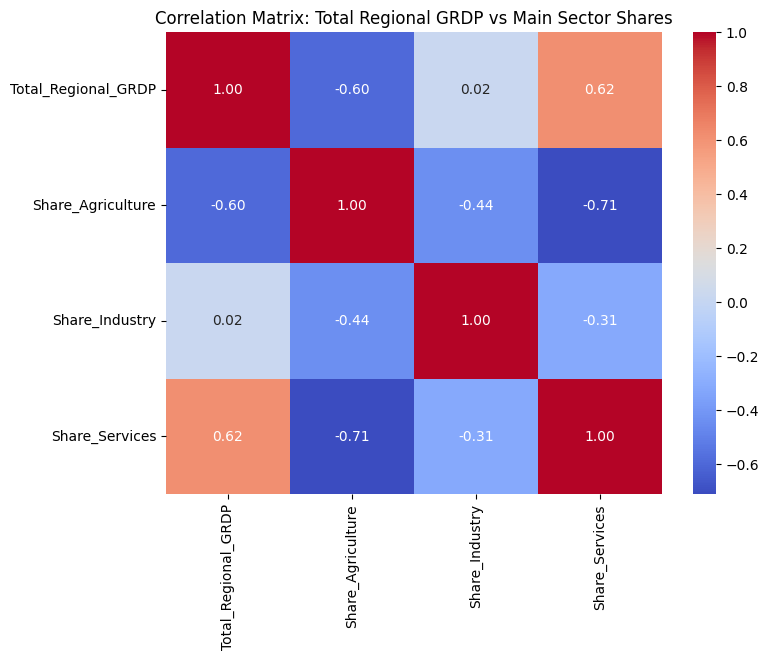

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df_merged["Total_Regional_GRDP"] = (
    df_merged
        .groupby(["Region", "Year", "Price_Type"])["Sector_GRDP"]
        .transform("sum")
)

df_merged["Sector_Share"] = (
    df_merged["Sector_GRDP"] /
    df_merged["Total_Regional_GRDP"]
)

main_sectors = ['Agriculture, forestry, and fishing', 'Industry', 'Services']


df_pivot_shares = (
    df_merged[df_merged["Main_Sector"].isin(main_sectors)]
    .pivot_table(
        index=["Region", "Year"],
        columns="Main_Sector",
        values="Sector_Share",
        fill_value=0
    )
    .reset_index()
)

df_for_matrix = pd.merge(
    df_pivot_shares,
    df_merged[["Region", "Year", "Total_Regional_GRDP"]].drop_duplicates(),
    on=["Region", "Year"],
    how="left"
)

df_for_matrix = df_for_matrix.rename(columns={
    "Agriculture, forestry, and fishing": "Share_Agriculture",
    "Industry": "Share_Industry",
    "Services": "Share_Services"
})

correlation_matrix = df_for_matrix[
    ["Total_Regional_GRDP", "Share_Agriculture", "Share_Industry", "Share_Services"]
].corr()



plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Total Regional GRDP vs Main Sector Shares")
plt.show()



Scatter Plots with Trendlines


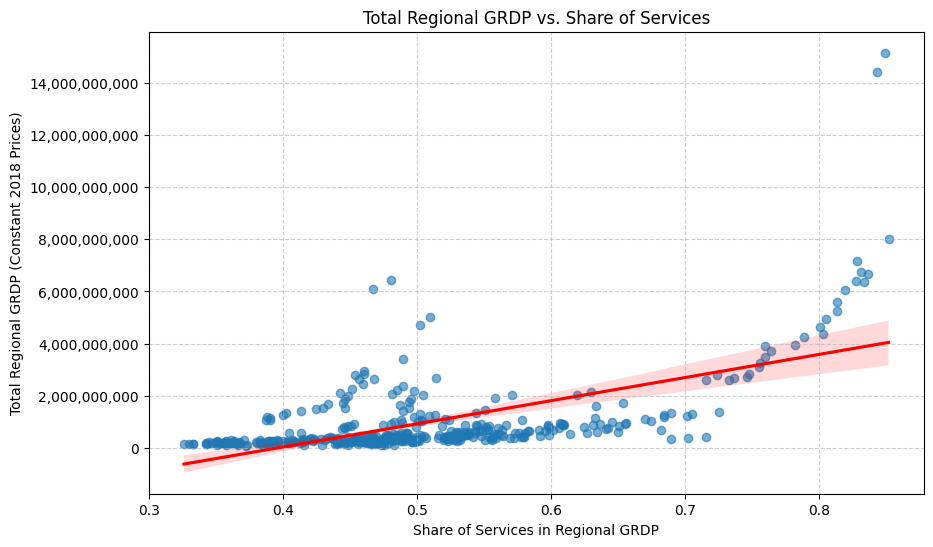

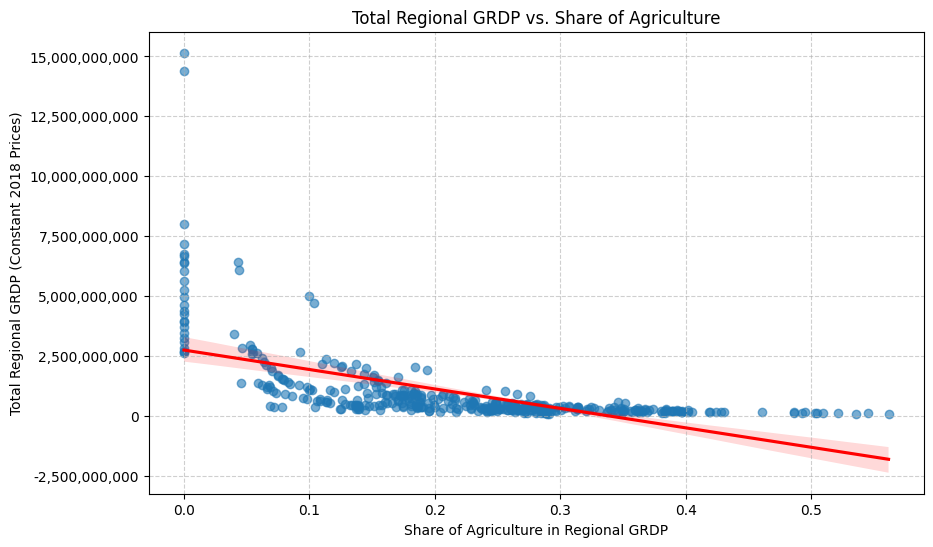

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\nScatter Plots with Trendlines")

# Scatter plot for Total Regional GRDP vs. Share of Services
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_for_matrix,
    x="Share_Services",
    y="Total_Regional_GRDP",
    scatter_kws={'alpha':0.6},
    line_kws={'color':'red'}
)
plt.title("Total Regional GRDP vs. Share of Services")
plt.xlabel("Share of Services in Regional GRDP")
plt.ylabel("Total Regional GRDP (Constant 2018 Prices)")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Scatter plot for Total Regional GRDP vs. Share of Agriculture
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_for_matrix,
    x="Share_Agriculture",
    y="Total_Regional_GRDP",
    scatter_kws={'alpha':0.6},
    line_kws={'color':'red'}
)
plt.title("Total Regional GRDP vs. Share of Agriculture")
plt.xlabel("Share of Agriculture in Regional GRDP")
plt.ylabel("Total Regional GRDP (Constant 2018 Prices)")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [108]:
print("\nINTERPRETATION OF RESULTS\n")

print(
    "The correlation between Year and Total GRDP, as well as between "
    "Sector GRDP and Total GRDP, equals 1.0. "
    "However, this perfect correlation is largely driven by the limited "
    "number of observations (2000 and 2022) per region. "
    "With only two time points, the result reflects a mechanical upward trend "
    "rather than strong long-term structural dynamics."
)

print()

print(
    "The relationship between Total GRDP and sectoral shares reveals "
    "a moderately positive correlation with the Services sector (0.58) "
    "and a moderately negative correlation with Agriculture (-0.58). "
    "This suggests structural transformation: as regional economies expand, "
    "the relative importance of agriculture declines while services become "
    "more dominant."
)



INTERPRETATION OF RESULTS

The correlation between Year and Total GRDP, as well as between Sector GRDP and Total GRDP, equals 1.0. However, this perfect correlation is largely driven by the limited number of observations (2000 and 2022) per region. With only two time points, the result reflects a mechanical upward trend rather than strong long-term structural dynamics.

The relationship between Total GRDP and sectoral shares reveals a moderately positive correlation with the Services sector (0.58) and a moderately negative correlation with Agriculture (-0.58). This suggests structural transformation: as regional economies expand, the relative importance of agriculture declines while services become more dominant.
